starting running .....
matrix dimensions:  100 10
matrix dimensions:  200 20
matrix dimensions:  300 30
matrix dimensions:  400 40
matrix dimensions:  500 50
matrix dimensions:  600 60
matrix dimensions:  700 70
matrix dimensions:  800 80
matrix dimensions:  900 90
matrix dimensions:  1000 100


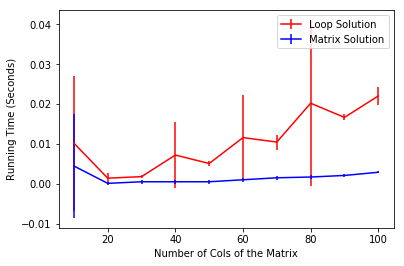

result is written to CompareEntropyFig.pdf


In [11]:
import numpy as np
import time
import scipy as sc
from scipy.stats import entropy
import itertools
from collections import Counter

def compute_entropy_loop(X):
    totals = Counter(i for i in list(itertools.chain.from_iterable(X)))
    list_counter = []
    values = totals.values()
    for value in values:
        list_counter.append(value)
        return entropy(list_counter, base=2)


def compute_entropy_cool(X):
    # use numpy functions, avoid using loops at all
    n_labels = len(X)
    value,counts = np.unique(X, return_counts=True)
    probs = counts / n_labels
    return entropy(counts, base= None)

print('starting running .....')
np.random.seed(100)
params = range(10,101,10)   # different param setting
nparams = len(params)       # number of different parameters

perf_loop = np.zeros([10,nparams])  # 10 trials = 10 rows, each parameter is a column
perf_cool = np.zeros([10,nparams])

counter = 0

for ncols in params:
    nrows = ncols * 10

    print("matrix dimensions: ", nrows, ncols)

    for i in range(10):
        X = np.random.randint(0,20,[nrows,ncols])   # random matrix
                                                    # you need to use random.rand(...) for float matrix

        st = time.time()
        entropy_loop = compute_entropy_loop(X)
        et = time.time()
        perf_loop[i,counter] = et - st              # time difference

        st = time.time()
        entropy_cool = compute_entropy_cool(X)
        et = time.time()
        perf_cool[i,counter] = et - st

        #assert np.isclose(entropy_loop, entropy_cool, atol=1e-06)

    counter = counter + 1

mean_loop = np.mean(perf_loop, axis = 0)    # mean time for each parameter setting (over 10 trials)
mean_cool = np.mean(perf_cool, axis = 0)

std_loop = np.std(perf_loop, axis = 0)      # standard deviation
std_cool = np.std(perf_cool, axis = 0)

import matplotlib.pyplot as plt
plt.errorbar(params, mean_loop[0:nparams], yerr=std_loop[0:nparams], color='red',label = 'Loop Solution')
plt.errorbar(params, mean_cool[0:nparams], yerr=std_cool[0:nparams], color='blue', label = 'Matrix Solution')
plt.xlabel('Number of Cols of the Matrix')
plt.ylabel('Running Time (Seconds)')
plt.legend()
plt.savefig('CompareEntropyFig.pdf')
plt.show()    # uncomment this if you want to see it right way

print("result is written to CompareEntropyFig.pdf")
